In [2]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [3]:
df_analyse=pd.read_csv('Documents/ads_covid-19/data/processed/CompleteProcessedData.csv',sep=';')  
df_analyse.sort_values('date',ascending=True)

,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,2021-01-02,52586.0,2811093.0,58991.0,100159.0,8166.0,17608.0,13.0,159.0,1634834.0,...,77182.0,1.0,27.0,114083.0,1482.0,4.0,84919135.0,2101.0,21230.0,14491.0
1,2021-01-03,52709.0,2833088.0,59438.0,100408.0,8192.0,17642.0,15.0,160.0,1640718.0,...,77258.0,1.0,27.0,114230.0,1494.0,4.0,85439654.0,2101.0,21582.0,15265.0
2,2021-01-04,52909.0,2854863.0,59623.0,100645.0,8249.0,17684.0,15.0,160.0,1648940.0,...,77258.0,1.0,27.0,114407.0,1497.0,4.0,85995864.0,2101.0,21993.0,15829.0
3,2021-01-05,53011.0,2881708.0,60283.0,100873.0,8308.0,17756.0,15.0,160.0,1662730.0,...,77295.0,1.0,27.0,114662.0,1504.0,4.0,86737472.0,2101.0,22645.0,17194.0
4,2021-01-06,53105.0,2917497.0,61008.0,101120.0,8348.0,17864.0,15.0,163.0,1676171.0,...,77350.0,1.0,27.0,114908.0,1505.0,4.0,87528430.0,2102.0,23495.0,17804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2022-07-16,183445.0,12169669.0,293917.0,266424.0,44671.0,101901.0,3496.0,8712.0,9426171.0,...,242140.0,11722.0,29.0,529730.0,10759850.0,456.0,561997366.0,11848.0,327994.0,256083.0
561,2022-07-17,183572.0,12171116.0,293917.0,266445.0,44671.0,101901.0,3496.0,8712.0,9465827.0,...,242140.0,11722.0,29.0,530402.0,10760595.0,456.0,562444664.0,11848.0,327994.0,256083.0
562,2022-07-18,183687.0,12176520.0,293917.0,266487.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,242305.0,11730.0,29.0,530649.0,10761435.0,456.0,563679398.0,11848.0,327994.0,256083.0
563,2022-07-19,183908.0,12208985.0,293917.0,266542.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,242366.0,11730.0,29.0,530649.0,10762532.0,533.0,565202691.0,11849.0,328550.0,256187.0


In [4]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=800000000 #max susceptible population
beta=0.8   # infection spread dynamics
gamma=0.1  # recovery rate

## beta/gamma is the basic reproduction number, <1 means no spread virus


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [5]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to calculate SIR curves

In [6]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

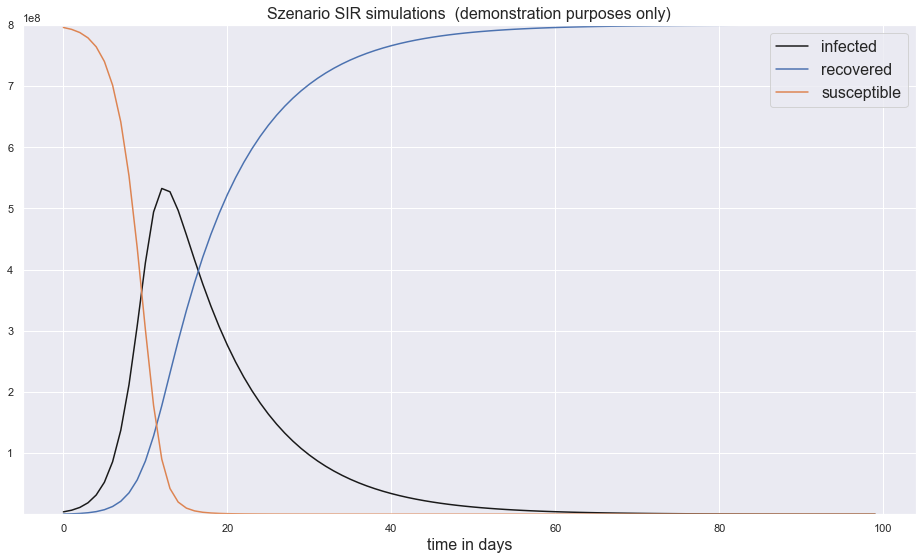

In [7]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 800000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [8]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Fitting data to a model

In [9]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [10]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [11]:
## fit the data set ydata, here the simulative data set of the infected curve

ydata = propagation_rates.infected
t=np.arange(len(ydata))

In [12]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.00389147 0.00097103]  start infect: 3862992.382144764
Optimal parameters: beta = 0.7431914316213551  and gamma =  0.09871303279052865


In [13]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

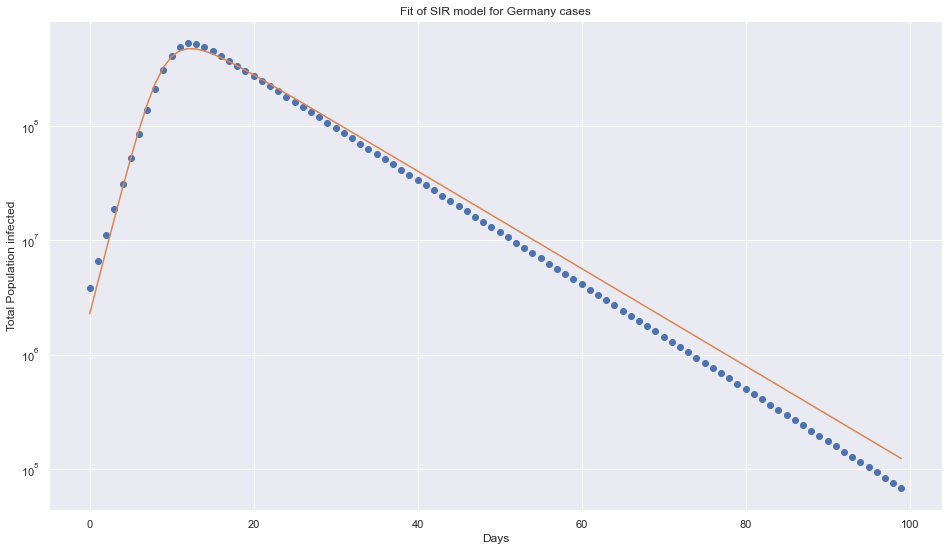

Optimal parameters: beta = 0.7431914316213551  and gamma =  0.09871303279052865
Basic Reproduction Number R0  7.5288076013065535


In [14]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
#plt.semilogy(fitted)

plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Total Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

# Fitting the parameters of SIR model

In [15]:
df_analyse

,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,2021-01-02,52586.0,2811093.0,58991.0,100159.0,8166.0,17608.0,13.0,159.0,1634834.0,...,77182.0,1.0,27.0,114083.0,1482.0,4.0,84919135.0,2101.0,21230.0,14491.0
1,2021-01-03,52709.0,2833088.0,59438.0,100408.0,8192.0,17642.0,15.0,160.0,1640718.0,...,77258.0,1.0,27.0,114230.0,1494.0,4.0,85439654.0,2101.0,21582.0,15265.0
2,2021-01-04,52909.0,2854863.0,59623.0,100645.0,8249.0,17684.0,15.0,160.0,1648940.0,...,77258.0,1.0,27.0,114407.0,1497.0,4.0,85995864.0,2101.0,21993.0,15829.0
3,2021-01-05,53011.0,2881708.0,60283.0,100873.0,8308.0,17756.0,15.0,160.0,1662730.0,...,77295.0,1.0,27.0,114662.0,1504.0,4.0,86737472.0,2101.0,22645.0,17194.0
4,2021-01-06,53105.0,2917497.0,61008.0,101120.0,8348.0,17864.0,15.0,163.0,1676171.0,...,77350.0,1.0,27.0,114908.0,1505.0,4.0,87528430.0,2102.0,23495.0,17804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2022-07-16,183445.0,12169669.0,293917.0,266424.0,44671.0,101901.0,3496.0,8712.0,9426171.0,...,242140.0,11722.0,29.0,529730.0,10759850.0,456.0,561997366.0,11848.0,327994.0,256083.0
561,2022-07-17,183572.0,12171116.0,293917.0,266445.0,44671.0,101901.0,3496.0,8712.0,9465827.0,...,242140.0,11722.0,29.0,530402.0,10760595.0,456.0,562444664.0,11848.0,327994.0,256083.0
562,2022-07-18,183687.0,12176520.0,293917.0,266487.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,242305.0,11730.0,29.0,530649.0,10761435.0,456.0,563679398.0,11848.0,327994.0,256083.0
563,2022-07-19,183908.0,12208985.0,293917.0,266542.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,242366.0,11730.0,29.0,530649.0,10762532.0,533.0,565202691.0,11849.0,328550.0,256187.0


In [16]:
## slice out some true data of a country

ydata = np.array(df_analyse.Germany[::])
t=np.arange(len(ydata))

In [17]:
# ensure re-initialization 
# attenion when slicing gout only a time window 
# (one Corana wave) the overall N0 is not the full popoulation size 
N0=800000000

I0=ydata[0]
S0=N0-I0
R0=0
print('start infected:',I0)
print('cumulative sum of invected after period',ydata[-1])
print('Number of days',len(ydata))
print('N0',N0)

start infected: 1755351.0
cumulative sum of invected after period 30131303.0
Number of days 565
N0 800000000


In [18]:
## get the model parameters / fit the model
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
fitted=fit_odeint(t, *popt)

standard deviation errors :  [3.09754406e-06 1.80552772e-05]  start infect: 1755351.0
Optimal parameters: beta = 2.9377593494094134e-05  and gamma =  -0.005109566029506186


In [149]:
df_analyse=df_analyse.iloc[:150, : ]
df_analyse


,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,2021-01-02,52586.0,2811093.0,58991.0,100159.0,8166.0,17608.0,13.0,159.0,1634834.0,...,77182.0,1.0,27.0,114083.0,1482.0,4.0,84919135.0,2101.0,21230.0,14491.0
1,2021-01-03,52709.0,2833088.0,59438.0,100408.0,8192.0,17642.0,15.0,160.0,1640718.0,...,77258.0,1.0,27.0,114230.0,1494.0,4.0,85439654.0,2101.0,21582.0,15265.0
2,2021-01-04,52909.0,2854863.0,59623.0,100645.0,8249.0,17684.0,15.0,160.0,1648940.0,...,77258.0,1.0,27.0,114407.0,1497.0,4.0,85995864.0,2101.0,21993.0,15829.0
3,2021-01-05,53011.0,2881708.0,60283.0,100873.0,8308.0,17756.0,15.0,160.0,1662730.0,...,77295.0,1.0,27.0,114662.0,1504.0,4.0,86737472.0,2101.0,22645.0,17194.0
4,2021-01-06,53105.0,2917497.0,61008.0,101120.0,8348.0,17864.0,15.0,163.0,1676171.0,...,77350.0,1.0,27.0,114908.0,1505.0,4.0,87528430.0,2102.0,23495.0,17804.0
5,2021-01-07,53207.0,2952934.0,61705.0,101382.0,8348.0,17974.0,15.0,163.0,1690006.0,...,77412.0,1.0,27.0,115322.0,1509.0,4.0,88399568.0,2104.0,24297.0,18675.0
6,2021-01-08,53332.0,2989374.0,62378.0,101657.0,8489.0,18066.0,15.0,167.0,1703352.0,...,77485.0,1.0,27.0,115667.0,1512.0,4.0,89236186.0,2104.0,25326.0,19660.0
7,2021-01-09,53400.0,3024446.0,63033.0,101913.0,8586.0,18156.0,15.0,169.0,1714409.0,...,77530.0,1.0,27.0,116172.0,1513.0,4.0,89993680.0,2104.0,26567.0,20499.0
8,2021-01-10,53489.0,3056084.0,63595.0,102144.0,8586.0,18193.0,15.0,176.0,1722217.0,...,77572.0,1.0,27.0,116610.0,1514.0,4.0,90596115.0,2104.0,27728.0,21477.0
9,2021-01-11,53538.0,3084082.0,63971.0,102369.0,8586.0,18254.0,15.0,176.0,1730921.0,...,77611.0,1.0,27.0,116983.0,1515.0,4.0,91210050.0,2105.0,28596.0,22297.0


In [19]:
df_analyse=df_analyse.drop(['Mongolia'], axis=1)

In [20]:
df_analyse=df_analyse.drop(['Vietnam'], axis=1)

In [21]:
df_analyse.to_csv('Documents/ads_covid-19/data/processed/COVID_sir_length.csv', sep=';',index=False)

In [22]:
df_analyse

,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,2021-01-02,52586.0,2811093.0,58991.0,100159.0,8166.0,17608.0,13.0,159.0,1634834.0,...,20275.0,77182.0,1.0,27.0,114083.0,4.0,84919135.0,2101.0,21230.0,14491.0
1,2021-01-03,52709.0,2833088.0,59438.0,100408.0,8192.0,17642.0,15.0,160.0,1640718.0,...,20823.0,77258.0,1.0,27.0,114230.0,4.0,85439654.0,2101.0,21582.0,15265.0
2,2021-01-04,52909.0,2854863.0,59623.0,100645.0,8249.0,17684.0,15.0,160.0,1648940.0,...,21426.0,77258.0,1.0,27.0,114407.0,4.0,85995864.0,2101.0,21993.0,15829.0
3,2021-01-05,53011.0,2881708.0,60283.0,100873.0,8308.0,17756.0,15.0,160.0,1662730.0,...,22104.0,77295.0,1.0,27.0,114662.0,4.0,86737472.0,2101.0,22645.0,17194.0
4,2021-01-06,53105.0,2917497.0,61008.0,101120.0,8348.0,17864.0,15.0,163.0,1676171.0,...,23048.0,77350.0,1.0,27.0,114908.0,4.0,87528430.0,2102.0,23495.0,17804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2022-07-16,183445.0,12169669.0,293917.0,266424.0,44671.0,101901.0,3496.0,8712.0,9426171.0,...,965370.0,242140.0,11722.0,29.0,529730.0,456.0,561997366.0,11848.0,327994.0,256083.0
561,2022-07-17,183572.0,12171116.0,293917.0,266445.0,44671.0,101901.0,3496.0,8712.0,9465827.0,...,965370.0,242140.0,11722.0,29.0,530402.0,456.0,562444664.0,11848.0,327994.0,256083.0
562,2022-07-18,183687.0,12176520.0,293917.0,266487.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,965370.0,242305.0,11730.0,29.0,530649.0,456.0,563679398.0,11848.0,327994.0,256083.0
563,2022-07-19,183908.0,12208985.0,293917.0,266542.0,45061.0,102209.0,3535.0,8712.0,9465827.0,...,967808.0,242366.0,11730.0,29.0,530649.0,533.0,565202691.0,11849.0,328550.0,256187.0


In [23]:
#Fitting parameter for SIR model
df_all = df_analyse.columns
df_all = list(df_all)
for each in df_all[1:]:
    ydata = np.array(df_analyse[each])
    t=np.arange(len(ydata))
    N0 = 80000000 #max susceptible population

    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0

    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata,maxfev=100000)
    perr = np.sqrt(np.diag(pcov))
    

    # get the final fitted curve
    fitted=fit_odeint(t, *popt)
    df_analyse[each +'_fitted'] = fitted 

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\kiran\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFra

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[each +'_fitted'] = fitted
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\2262375775.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

In [24]:
df_analyse.to_csv('Documents/ads_covid-19/data/processed/COVID_sir_fitted_table.csv', sep=';',index=False)

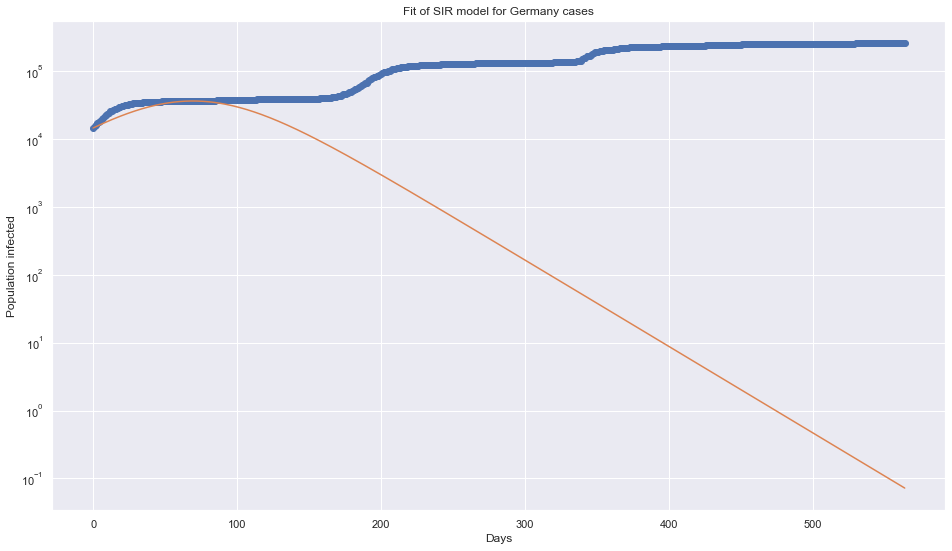

Optimal parameters: beta = 0.9957215876771417  and gamma =  0.9724283226968098
Basic Reproduction Number R0  1.023953708912687


In [28]:
plt.semilogy(t,ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

In [157]:
df_analyse.columns

Index(['date', 'Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       ...
       'Uruguay_fitted', 'Uzbekistan_fitted', 'Vanuatu_fitted',
       'Vatican_fitted', 'Venezuela_fitted', 'Wallis and Futuna_fitted',
       'World_fitted', 'Yemen_fitted', 'Zambia_fitted', 'Zimbabwe_fitted'],
      dtype='object', length=425)

In [29]:
import pandas as pd
import numpy as np
import dash_bootstrap_components as dbc

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State


import plotly.graph_objects as go
from plotly import tools

import os
print(os.getcwd())
df_country = pd.read_csv('Documents/ads_covid-19/data/processed/COVID_sir_length.csv',sep=';')
df_input_sir = pd.read_csv('Documents/ads_covid-19/data/processed/COVID_sir_fitted_table.csv',sep=';')
df_country_all = df_country.columns
df_all = df_input_sir.columns
df_all = list(df_all[:109])

'''Dashboard is created by using an external stylesheet named BOOTSTRAP. 
BOOTSTRAP allows us to divide the dashboard into Rows and columns.
COVID-19 dashbord has 5 Rows and 2 columns'''

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = 'SIR MODEL'

app.layout = html.Div([
        
        dbc.Row(dbc.Col(html.Div(dcc.Markdown('''
                            # Enterprise Data Science: COVID-19 Data Analytics
                            Goals of the project:
                            * To trace the confirmed cases for all the countries
                            * To calculate the doubling rate.
                            * To simulate the spread of COVID-19 in Brazil using SIR model and also for 100+ countries.
                            * To create a user friendly dashboard, which shows the current count of confirmed cases, doubling rate and SIR model.
                            ''')),
                        width={'size': 10, 'offset': 1},
                        )
                ),
        
        dbc.Row(
            [   
                #Dropdown for SIR model
                dbc.Col(dcc.Dropdown(
                            id='country_dropdown_sir',
                            options=[ {'label': each,'value':each} for each in df_country_all[1:]],
                            value='Germany', # which are pre-selected
                            multi= False
                            ),
                        width={'size': 5, "offset": 2, 'order': 'second'}
                        ),
                ], align=True
        ),
                    
        dbc.Row(
            [
                
                dbc.Col(dcc.Graph(
                            id='SIR_model'
                            ),
                        width=6, md={'size': 5,  "offset": 1, 'order': 'last'}
                        ),
            ]
        ),


])


@app.callback(
    Output('SIR_model', 'figure'),
    [Input('country_dropdown_sir', 'value')])

def SIR_fig(con_input):
    df= df_input_sir
   
    
    for i in df[1:]:
        data = []
        trace = go.Scatter(x=df.date,
                        y=df[con_input],
                        mode='lines+markers',
                        name = con_input)
        data.append(trace)
        
        trace_fitted = go.Scatter(x=df.date,
                        y=df[con_input +'_fitted'], 
                        mode='lines+markers',
                        name=con_input+'_fitted')
        data.append(trace_fitted)
        
        
            
    return {'data': data,
            'layout' : dict(
                height=900,
                title= 'SIR model',
                xaxis={'title':'Days',
                    'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                yaxis={'title': "Infected population",
                    'type':"log",
                       'range':'[1.1,5.5]'
                      }
                
            )
        }

if __name__ == '__main__':

    app.run_server(debug=True, port= 8051, use_reloader=False)

C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3880887550.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\kiran\AppData\Local\Temp\ipykernel_22276\3880887550.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


C:\Users\kiran
Dash is running on http://127.0.0.1:8051/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
